csv 파일 불러온 후 데이터프레임으로 변환
- pred_data 경로: csv 파일 위치

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
pred_data = pd.read_csv('/PATH/TO/output.csv')
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass",
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

val_split.json 파일 불러온 후 데이터프레임으로 변환
- coco 경로: val_split.json 위치

In [3]:
from pycocotools.coco import COCO
coco = COCO('/PATH/TO/val_split.json')

gt_data = pd.DataFrame()

image_ids = []
class_name = []
class_id = []
x_min = []
y_min = []
x_max = []
y_max = []
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass",
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
for image_id in coco.getImgIds():

    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_info['id'])
    anns = coco.loadAnns(ann_ids)

    file_name = image_info['file_name']

    for ann in anns:
        image_ids.append(file_name)
        class_name.append(classes[ann['category_id']])
        class_id.append(ann['category_id'])
        x_min.append(float(ann['bbox'][0]))
        y_min.append(float(ann['bbox'][1]))
        x_max.append(float(ann['bbox'][0]) + float(ann['bbox'][2]))
        y_max.append(float(ann['bbox'][1]) + float(ann['bbox'][3]))

gt_data['image_id'] = image_ids
gt_data['class_name'] = class_name
gt_data['class_id'] = class_id
gt_data['x_min'] = x_min
gt_data['y_min'] = y_min
gt_data['x_max'] = x_max
gt_data['y_max'] = y_max

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [9]:
gt_data[gt_data['image_id']=='train/0305.jpg']

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
275,train/0305.jpg,General trash,0,0.0,0.0,548.6,745.7
276,train/0305.jpg,Metal,3,458.4,5.8,1023.7,423.3
277,train/0305.jpg,General trash,0,674.8,96.2,1023.8,774.8
278,train/0305.jpg,Metal,3,382.2,0.0,928.7,28.8
279,train/0305.jpg,General trash,0,679.6,0.0,829.4,217.7
280,train/0305.jpg,Plastic,5,168.1,0.0,385.8,845.9
281,train/0305.jpg,Plastic,5,370.3,1.7,1023.8,475.8
282,train/0305.jpg,Metal,3,273.8,0.0,720.3,99.9
283,train/0305.jpg,Metal,3,196.8,84.3,917.1,964.0
284,train/0305.jpg,Metal,3,317.2,39.3,755.8,208.3


gt_bbox 와 pred_bbox 시각화
- path: val 이미지가 저장된 폴더
- strat_index, end_index: 시각화 할 범위 조절

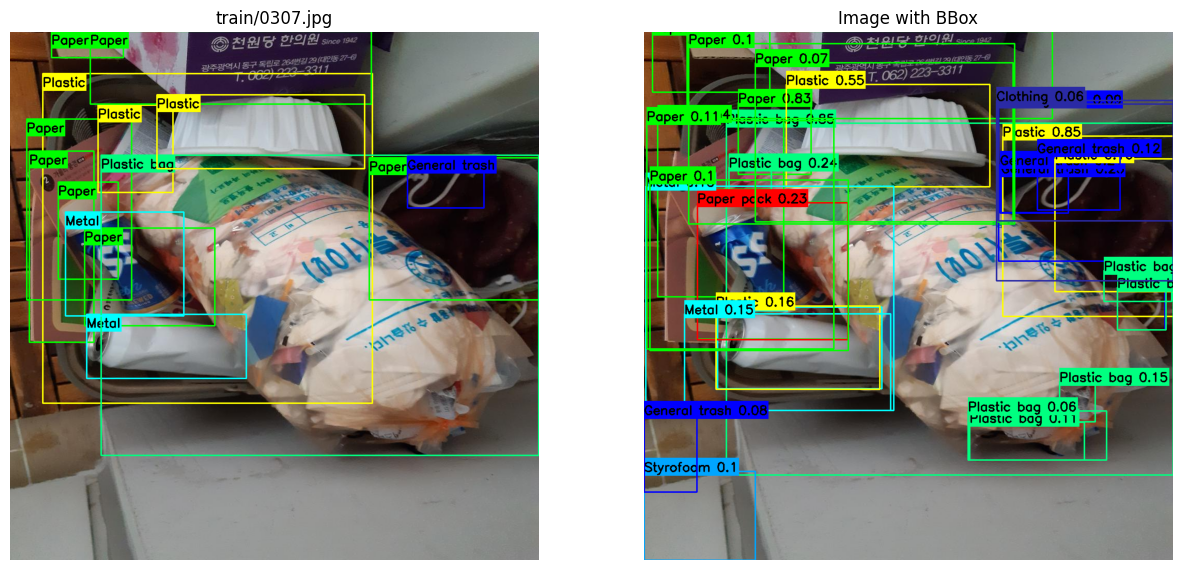

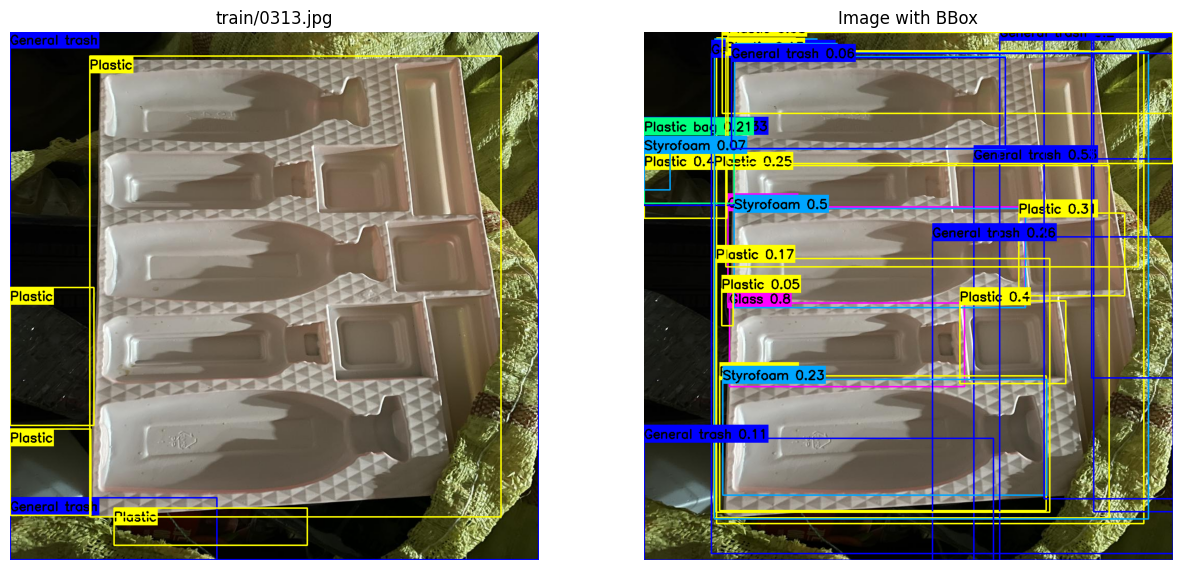

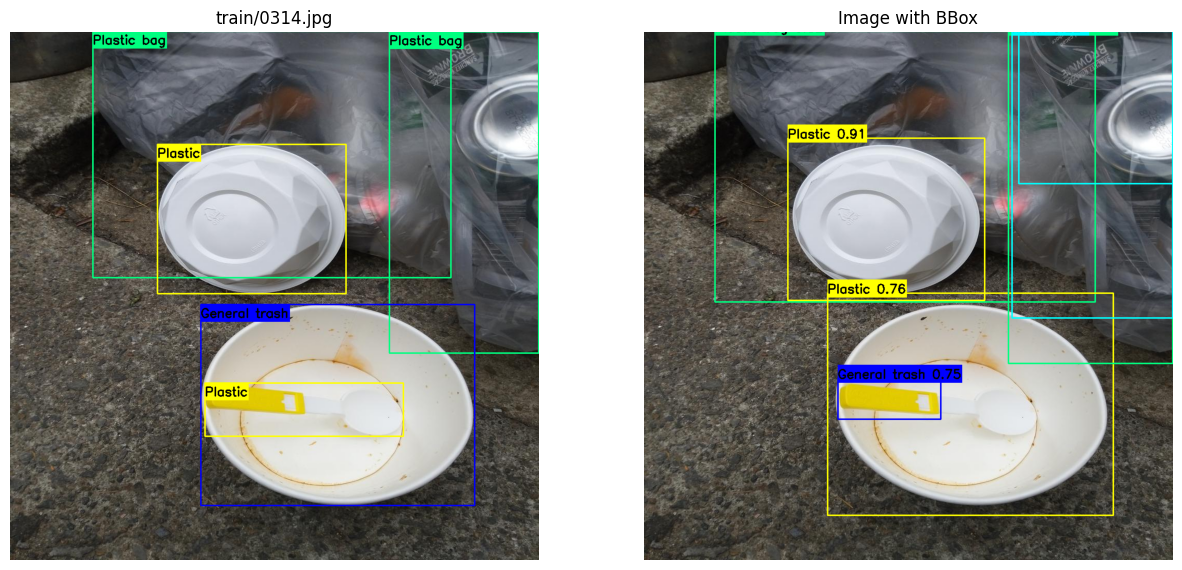

In [15]:
path = '/PATH/TO/image_folder'
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_thickness = 2
text_color = (0, 0, 0)
colors = [
    (0, 0, 255),     # Red
    (0, 255, 0),     # Green
    (255, 0, 0),     # Blue
    (0, 255, 255),   # Yellow
    (255, 0, 255),   # Magenta
    (255, 255, 0),   # Cyan
    (0, 165, 255),   # Orange
    (0, 255, 128),   # Light Green
    (128, 0, 128),   # Purple
    (42, 42, 165)    # Brown
]
start_index = 58 
end_index = 60

# 지정한 인덱스의 데이터를 처리
for index in range(start_index, end_index+1):
    # predict bbox 데이터 설정
    pred_row = pred_data.iloc[index]
    data_path = pred_row['image_id']
    image_path = path + data_path
    pred_bbox_info = pred_row['PredictionString']

    # gt bbox 데이터 설정
    gt_row = gt_data[gt_data['image_id'] == data_path]

    # 이미지 불러오기
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    image_pred_bbox = image.copy()
    image_gt_bbox = image.copy()

    # bounding box를 하나도 감지 못 한 경우
    if type(pred_bbox_info) is float:
        for _, row in gt_row.iterrows():
            (text_width, text_height), baseline = cv2.getTextSize(row['class_name'], font, font_scale, font_thickness)
            cv2.rectangle(image_gt_bbox, (int(row['x_min']), int(row['y_min'])), (int(row['x_max']), int(row['y_max'])), colors[row['class_id']], 2)
            cv2.rectangle(image_gt_bbox, (int(row['x_min']), int(row['y_min']) - text_height - baseline+25), 
                        (int(row['x_min']) + text_width, int(row['y_min']) + baseline+25), colors[row['class_id']], -1)
            cv2.putText(image_gt_bbox, row['class_name'], (int(row['x_min']), int(row['y_min'])+25), font, font_scale, text_color, font_thickness)

        fig, axs = plt.subplots(1, 2, figsize=(15, 10))
        # gt bounding box가 그려진 이미지 표시
        axs[0].imshow(image_gt_bbox)
        axs[0].axis('off')
        axs[0].set_title(data_path)

        # pred bounding box가 그려진 이미지 표시
        axs[1].imshow(image)
        axs[1].set_title("Image with BBox")
        axs[1].axis('off')
        plt.show()

    else:
        for _, row in gt_row.iterrows():
            (text_width, text_height), baseline = cv2.getTextSize(row['class_name'], font, font_scale, font_thickness)
            cv2.rectangle(image_gt_bbox, (int(row['x_min']), int(row['y_min'])), (int(row['x_max']), int(row['y_max'])), colors[row['class_id']], 2)
            cv2.rectangle(image_gt_bbox, (int(row['x_min']), int(row['y_min']) - text_height - baseline+25), 
                        (int(row['x_min']) + text_width, int(row['y_min']) + baseline+25), colors[row['class_id']], -1)
            cv2.putText(image_gt_bbox, row['class_name'], (int(row['x_min']), int(row['y_min'])+25), font, font_scale, text_color, font_thickness)

        # bounding box 정보를 공백을 기준으로 분리하여 리스트로 변환
        pred_bbox_list = pred_bbox_info.split()
        # 6개의 값씩 묶어 각 bounding box 정보를 처리 (class_id, confidence, xmin, ymin, xmax, ymax)
        for i in range(0, len(pred_bbox_list), 6):
            class_id = int(pred_bbox_list[i])
            confidence = float(pred_bbox_list[i + 1])
            xmin = float(pred_bbox_list[i + 2])
            ymin = float(pred_bbox_list[i + 3])
            xmax = float(pred_bbox_list[i + 4])
            ymax = float(pred_bbox_list[i + 5])

            # OpenCV의 rectangle 함수로 bounding box 그리기
            cv2.rectangle(image_pred_bbox, (int(xmin), int(ymin)), (int(xmax), int(ymax)), colors[class_id], 2)

            # bounding box 위에 class 표시
            label = classes[class_id] + ' ' + str(round(confidence, 2))
            (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)
            cv2.rectangle(image_pred_bbox, (int(xmin), int(ymin) - text_height - baseline), 
                        (int(xmin) + text_width, int(ymin) + baseline), colors[class_id], -1)
            cv2.putText(image_pred_bbox, label, (int(xmin), int(ymin)), font, font_scale, text_color, font_thickness)
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 10))
        # gt bounding box가 그려진 이미지 표시
        axs[0].imshow(image_gt_bbox)
        axs[0].axis('off')
        axs[0].set_title(data_path)

        # pred bounding box가 그려진 이미지 표시
        axs[1].imshow(image_pred_bbox)
        axs[1].set_title("Image with BBox")
        axs[1].axis('off')
        plt.show()